In [13]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import laboratorio

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# ¿Qué hay de comer en el casino?

Sea el casino del Campus Miraflores con sus apetitosos menúes. Debido al recorte de presupuesto el casino sólo puede preparar tres almuerzos

1. (S1) Tallarines con salsa bolognesa
1. (S2) Porotos con rienda (pero sin longaniza)
1. (S3) Arvejas con huevo

Nota: El postre siempre es jalea

Para que no se note tanto que son sólo tres almuerzos el casino decide el almuerzo de cada día siguiendo una regla probabilística en base al menú del día anterior. Las reglas del casino son las siguientes

1. Si hoy hay tallarines la probabilidad de que mañana hayan (a) tallarines es 0.2, (b) porotos es 0.2 y (c) arvejas es 0.6
1. Si hoy hay porotos la probabilidad de que mañana hayan (a) tallarines es 0.6,  y (b) porotos es 0.4
1. Si hoy hay arvejas mañana habrán porotos

Asumiendo que el menú de hoy es tallarines prediga 

1. El almuerzo más probable para mañana 
1. El almuerzo más probable para pasado mañana
1. El almuerzo más probable en tres días más
1. El almuerzo más probable en un plazo muy largo

Responda primero de forma analítica, para esto complete la implementación de `transicion_x_pasos` en `laboratorio.py`

##### Desarrollo

$S_a$ =Tallarines

$S_B$ = Porotos

$S_C$ = arvejas

Con probabilidades condicionales para tallarines $P(s_A|s_A) = 0.2$, $P(s_B|s_A) = 0.2$, $P(s_C|s_A) = 0.6$ 


Con Probabilidades condicional para porotos $P(s_A|s_B) = 0.6$, $P(s_B|s_B) = 0.4$, $P(s_C|s_B) = 0.0$ 


Con Probabilidades condicional para arvejas $P(s_A|s_C) = 0.0$, $P(s_B|s_C) = 0.1$, $P(s_C|s_C) = 0$ 


##### Matriz de transicion

$$ 
P = \begin{pmatrix} P(s_A|s_A) & P(s_A|s_B) & P(s_A|s_B) \\ P(s_B|s_A) & P(s_B|s_B) &  P(s_B|s_C) \\ P(s_C|s_A) & P(s_C|s_B) &  P(s_C|s_C)\end{pmatrix}  = \begin{pmatrix} 0.2 & 0.2 & 0.6 \\ 0.6 & 0.4 & 0.0 \\ 0 & 1 & 0\end{pmatrix} 
$$

In [14]:
P = np.array([[0.2, 0.2, 0.6], [0.6, 0.4, 0], [0, 1, 0]]) 
almuerzos = ["Tallarines con salsa bolognesa","Porotos con rienda (pero sin longaniza)"," Arvejas con huevo"]

In [15]:
def estado_inicial(s0):
    return laboratorio.transicion_x_pasos(1, s0, P), laboratorio.transicion_x_pasos(2, s0, P),laboratorio.transicion_x_pasos(3, s0, P),laboratorio.transicion_x_pasos(30, s0, P)
def p_maxima(dia):
    return np.where(dia == max(dia))[0][0]

In [16]:
#mañana, pasado mañana, pasado 3 días, mes
m, pm, p3d,mes = estado_inicial([1,0,0])

In [17]:
print("Asumiendo que el menú de hoy es tallarines: ")

print("El almuerzo más probable para mañana es:", almuerzos[p_maxima(m)], 'con', m[p_maxima(m)]*100,'% de probabilidad')
print("El almuerzo más probable para pasado mañana:", almuerzos[p_maxima(pm)],'con', pm[p_maxima(pm)]*100,'% de probabilidad') 
print("El almuerzo más probable en tres días más es:",almuerzos[p_maxima(p3d)],'con',p3d[p_maxima(p3d)]*100,'% de probabilidad')
print('El almuerzo más probable en un mes:', almuerzos[p_maxima(mes)],'con', mes[p_maxima(mes)]*100,'% de probabilidad')

Asumiendo que el menú de hoy es tallarines: 
El almuerzo más probable para mañana es:  Arvejas con huevo con 60.0 % de probabilidad
El almuerzo más probable para pasado mañana: Porotos con rienda (pero sin longaniza) con 72.0 % de probabilidad
El almuerzo más probable en tres días más es: Tallarines con salsa bolognesa con 46.4 % de probabilidad
El almuerzo más probable en un mes: Porotos con rienda (pero sin longaniza) con 45.45452884125576 % de probabilidad


Ahora responda utilizando simulaciones de Monte Carlo. Para esto complete la implementación de `markov_monte_carlo` en `laboratorio.py`. Cuando haya terminado de implementar escoja adecuadamente los parámetros y simule las cadenas. Luego:

- Muestre graficamente tres cadenas simuladas
- Muestre graficamente el estado más probable en cada caso

Finalmente comente sobre el comportamiento transitorio y estacionario de las cadenas

In [18]:
# Soluciones por Monte Carlo
chains=10000
steps=10
tallarines = laboratorio.markov_monte_carlo(chains, steps,[1,0,0], P)

porotos = laboratorio.markov_monte_carlo(chains, steps, [0,1,0], P)

arvejas = laboratorio.markov_monte_carlo(chains, steps, [0,0,1], P)

## Cadenas simuladas

- Muestre graficamente tres cadenas simuladas

In [25]:
def cadenas(almuerzo,nombre):
    fig, ax = plt.subplots(figsize=(8, 4), tight_layout=True)
    ax.set_xlabel('Cantidad de iteraciones')
    ax.set_ylabel('Estados')
    ax.set_title('Simulacion para'+nombre) 
    for i in range(3):
        ax.plot(almuerzo[i, :], '-o', alpha=0.8, label =f'Cadena {i}')
        ax.legend();

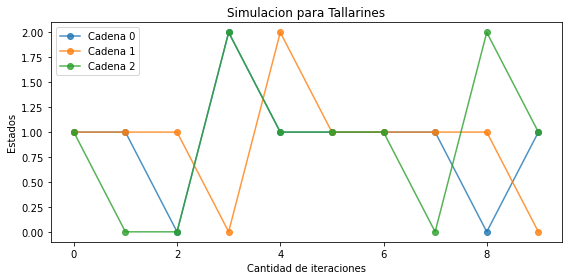

In [26]:
cadenas(tallarines,' Tallarines');

Repita los experimentos anteriores pero considerando que hoy hay porotos

In [27]:
# Analítica
m, pm, p3d,mes = estado_inicial([0,1,0])
print("Asumiendo que el menú de hoy es porotos: ")
print("El almuerzo más probable para mañana es:", almuerzos[p_maxima(m)], 'con', m[p_maxima(m)]*100,'% de probabilidad')
print("El almuerzo más probable para pasado mañana:", almuerzos[p_maxima(pm)],'con', pm[p_maxima(pm)]*100,'% de probabilidad') 
print("El almuerzo más probable en tres días más es:",almuerzos[p_maxima(p3d)],'con',p3d[p_maxima(p3d)]*100,'% de probabilidad')
print('El almuerzo más probable en un mes:', almuerzos[p_maxima(mes)],'con', mes[p_maxima(mes)]*100,'% de probabilidad')

Asumiendo que el menú de hoy es porotos: 
El almuerzo más probable para mañana es: Tallarines con salsa bolognesa con 60.0 % de probabilidad
El almuerzo más probable para pasado mañana: Tallarines con salsa bolognesa con 36.0 % de probabilidad
El almuerzo más probable en tres días más es: Porotos con rienda (pero sin longaniza) con 54.400000000000006 % de probabilidad
El almuerzo más probable en un mes: Porotos con rienda (pero sin longaniza) con 45.45455559320023 % de probabilidad


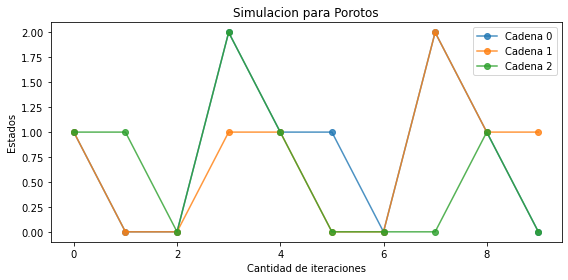

In [28]:
cadenas(porotos, ' Porotos');

In [31]:
def estado_mas_probable(almuerzo,steps,n_states,nombre_almuerzo):
    hist1 = np.zeros(shape=(steps, n_states))
    for j in range(steps):
        hist1[j, :] = np.array([sum(almuerzo[:, j] == s) for s in range(n_states)])
    fig, ax = plt.subplots(figsize=(8, 3), tight_layout=True)
    ax.plot(np.argmax(hist1, axis=1), marker='x')
    ax.set_xlabel('Cantidad de iteraciones')
    ax.set_ylabel('Estados probables')
    ax.set_title('Simulacion para '+nombre_almuerzo)
    ax.axhline(1, ls='--', c='k', alpha=0.5)
    ax.axhline(0, ls='--', c='k', alpha=0.5);

- Muestre graficamente el estado más probable en cada caso


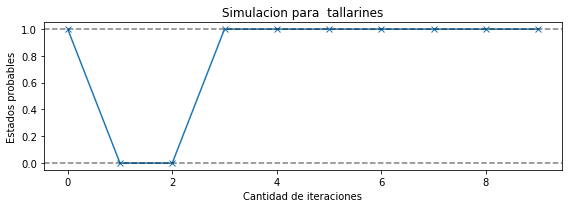

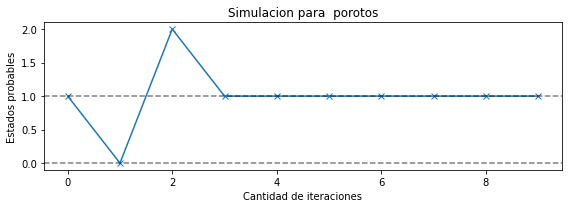

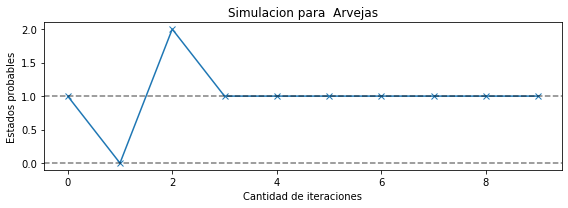

In [32]:
estado_mas_probable(tallarines,10,len(np.unique(tallarines)),' tallarines');
estado_mas_probable(porotos,10,len(np.unique(porotos)),' porotos');
estado_mas_probable(arvejas,10,len(np.unique(arvejas)),' Arvejas');

### Comentarios:

Basado en las gráficas para los 3 tipos de almuerzos, logramos ver que a medida que las simulaciones actúan sobre las diferentes cadenas, éstas pasan por los 3 estados posibles logrando que estos puedan ser reducibles. 

Por otro lado, a medida que aumentamos el horizonte de simulación para encontrar algún punto de no retorno, se logra visualizar que a partir de las 3 iteraciones ya éstas son irreducibles, llegando por igual situación o simulación indiferente del plato de preferencia a un estado común, donde podemos atribuir a la ley de los grandes números, cual conjunto de simulaciones por evento convergen a un valor esperado.

Podemos decir además que nuestro conjunto de estados por almuerzo es ergódico, ya que para una matriz de transición "P", independiente del estado inicial, converge a un estado común.